# **Finding The Next Best City.**
I am going to help people in [All In Energy](https://allinenergy.org) to take a data-driven approach in deciding where to expand next. I am using [Mass Assessor Database](https://www.mass.gov/get-a-map) as the basis to look around the area which one has potential. Then, I am going to use All In Energy data to be a comparison if any of the potential cities can follow the success they already did in Boston, Cambridge, Methuen, and Lawrence.

# The Goals
"The Best" has always been relative to what we compare something with. Defining what the best is crucial part in this process as it will shape our decision later in terms of what we are looking for. So, the metrics of the best city should be:
* Have the least amount of distance from All In Energy in Boston.
* Have the most amount of 1-4 Family buildings.
* Have the most population that speaks other language than English.
* Have the most renters.

## A. Jupyter Notebook
The raw data from Mass Government website was pretty huge. It was around 2GB originally, realizing my personal laptop could not do a suffiecient work with such big data, I decided to register for [Google Colab](https://colab.research.google.com). It is a free [Jupyter Notebook](https://jupyter.org/) that is hosted by Google where we utilize a substantial amount of computing power that Google provides for this purpose.


## B. Data
Although Assessor Database provided a lot of useful information, I already stripped down the raw data to make it the way I needed it to be. [The MassSave Program](https://www.masssave.com/) is focused on 1-4 family building and 5-49 residence houses. So, I used that category to filter the data and took only fields that I think is going to be useful. This is what comes from that cleaning process:

In [1]:
%pip install geopandas
%pip install ipyleaflet
%pip install -U matplotlib
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 8.5MB 2.0MB/s 
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
Note: you may need to restart the kernel to use updated packages.
Enabling notebook extension jupyter-leaflet/extension...
      - Validating: OK


In [2]:
import pandas as pd
data = pd.read_csv('MA Cities Data Oct 10.csv')

In [3]:
data.sample(5)

,CITY,1-Family,2-Family,3-Family,4-Family,5+ Family,OWNER,RENTER,SHAPE_AREA,distance,...,Gas,<20K,20K-39K,40K-59K,60K-74K,75K-99K,>100K,Spanish Speaker,Black,Latino or Hispanic
314,WEST BRIDGEWATER,1324.0,626.0,NaN,2.0,NaN,174.0,1778.0,4.059401e+07,9.650479,...,True,8.59,11.69,12.41,8.35,14.12,NaN,3.13,1.16,4.79
40,BREWSTER,4016.0,985.0,NaN,NaN,8.0,2399.0,2610.0,6.608788e+07,73.170680,...,True,11.23,14.43,12.28,12.98,12.80,NaN,0.77,0.73,1.83
43,BROCKTON,NaN,9175.0,1472.0,NaN,NaN,8145.0,2467.0,5.572409e+07,8.410981,...,True,19.79,17.44,15.37,9.30,12.89,25.21,8.65,40.81,11.11
240,REVERE,6019.0,4361.0,642.0,282.0,NaN,8266.0,3031.0,1.596156e+07,7.251880,...,True,18.76,17.06,16.95,10.52,11.10,25.61,28.46,5.16,32.48
34,BOLTON,999.0,NaN,NaN,NaN,NaN,839.0,160.0,5.200396e+07,34.552039,...,True,4.23,5.90,5.30,7.69,7.75,NaN,0.45,0.31,1.87


I chose [Pandas](https://pandas.pydata.org/) for processing such big data. Through my experience using Pandas, it has been really great in helping me doing a lot of things using very little code. Also, Pandas makes it easy to massage a really big data with a fraction of time. For example, since All In Energy is currently operating on, I want to exclude them from the main data so I filter them out.

In [4]:
data.describe()

,1-Family,2-Family,3-Family,4-Family,5+ Family,OWNER,RENTER,SHAPE_AREA,distance,Electric MWh,Threm,<20K,20K-39K,40K-59K,60K-74K,75K-99K,>100K,Spanish Speaker,Black,Latino or Hispanic
count,342.000000,304.000000,86.000000,107.000000,178.000000,339.000000,344.000000,3.440000e+02,344.000000,2.980000e+02,2.400000e+02,300.000000,267.000000,265.000000,303.000000,286.000000,143.000000,344.000000,335.000000,335.000000
mean,2668.570175,1798.256579,356.779070,117.317757,384.308989,2947.477876,1644.369186,5.949554e+07,53.565072,5.544814e+04,5.370727e+06,9.526000,12.264232,11.494679,8.432541,12.127657,40.155175,3.625930,2.488239,5.109642
std,3204.195302,2295.561841,757.935748,339.111369,2639.422005,3300.623378,4209.717501,3.394042e+07,46.316631,9.470242e+04,9.401798e+06,4.885163,4.427211,3.523575,2.482513,2.992728,14.916932,7.064476,4.204283,8.222208
min,21.000000,6.000000,2.000000,1.000000,1.000000,1.000000,8.000000,3.249309e+06,1.282582,4.650000e+02,1.832600e+04,2.240000,1.440000,3.700000,2.190000,0.780000,13.650000,0.000000,0.000000,0.000000
25%,818.250000,507.250000,18.250000,6.000000,4.250000,510.000000,311.750000,3.711579e+07,15.049065,1.241850e+04,1.231115e+06,6.305000,9.240000,8.640000,6.770000,10.222500,27.560000,0.847500,0.480000,1.600000
50%,1827.500000,1220.000000,80.500000,21.000000,17.000000,2054.000000,705.500000,5.447793e+07,34.633778,3.482050e+04,3.194283e+06,8.500000,11.650000,11.570000,8.460000,12.535000,40.090000,1.745000,1.420000,3.060000
75%,3505.250000,2411.750000,280.000000,82.000000,56.000000,4356.500000,1544.250000,7.357752e+07,90.733849,6.744325e+04,6.575716e+06,11.250000,15.135000,14.260000,10.030000,14.165000,52.115000,3.560000,2.730000,5.085000
max,32736.000000,25047.000000,4775.000000,2928.000000,33505.000000,26708.000000,67766.000000,2.661817e+08,163.520727,1.331961e+06,1.171037e+08,30.700000,24.540000,20.100000,16.500000,19.460000,71.890000,74.150000,40.810000,80.260000


## C. Exploratory Data Analysis
In order to answer the question which city is the best to expand to next, first we need to get a grasp on what kind of data we have. I will go through each criteria and try to find cities that fit best with each criteria.

### 1. The closest city from Boston
Although distance from All In Energy office in Brookline is not necessarily the most important factor, it is useful to know if there is any city surrounding Boston that fits the other criteria.

In [5]:
distance = data[['CITY', 'distance']].copy()
distance.sample(10)

,CITY,distance
63,CLINTON,39.733845
5,ALFORD,160.726332
83,EAST LONGMEADOW,97.078821
15,ATHOL,77.839426
178,MIDDLETON,8.515197
24,BELCHERTOWN,90.346345
300,WALTHAM,8.977461
194,NEW BEDFORD,19.715794
258,SHARON,7.314291
278,STOW,28.374481


First, we can plot the distance data into a histogram in order to get a sense of how spread our data is. I am using [Matplotlib]() library for plotting.

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

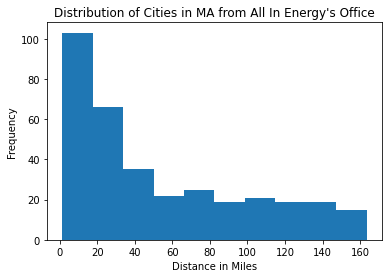

In [7]:
plt.hist(distance['distance'], bins=10)
plt.title("Distribution of Cities in MA from All In Energy's Office")
plt.xlabel('Distance in Miles')
plt.ylabel('Frequency')

The histogram shows us that fortunately a lot of cities are in range of 60 miles or less. That is a good news because it means we have a lot of options in the range of 1 hour driving. Next, we can map the distance values into a Choropleth map so we can better visualize them. I am using [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet/tree/stable) for interactive map visualization.

In [8]:
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap, SearchControl, 
 FullScreenControl, projections, SplitMapControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
        source: https://www.python-course.eu/pandas_python_binning.php
    """

    bins = []
    for low in np.arange(lower_bound, 
                     lower_bound + quantity*width + 1.0, width):
        bins.append((low, low+width))
    return bins

def values_to_bins(values, lower=0, width=10, bins=5, normalize=False):
    '''
        Put values into bins so we can control the classes in Choropleth Maps.
    '''
    if normalize:
        values = np.array(values)
        values = (values - np.min(values)) / (np.max(values) - np.min(values))
        values = values * 10
    bins = create_bins(lower, width, bins)
    bins = pd.IntervalIndex.from_tuples(bins)
    categorical_object = pd.cut(values, bins)
    results = []
    for value in categorical_object:
        if not pd.isna(value):
            results.append(value.left)
        else:
            results.append(-1.0)
    results = np.array(results)
    return (results - np.min(results)) / (np.max(results) - np.min(results))

In [10]:
distance['bins'] = values_to_bins(distance['distance'], width=20, bins=10)

In [11]:
cities_shp = gpd.read_file('maps/map cities.shp')
cities_shp = cities_shp.rename(columns={'TOWN':'CITY'})
cities_shp = cities_shp[['CITY', 'geometry']].merge(distance[['CITY', 'distance']], on='CITY', how='left')
cities_shp.to_file("maps/distance cities.geojson", driver='GeoJSON')
cities_shp 

In [12]:
all_in_energy = (42.3497392, -71.1067746)
zoom = 9
m = Map(center=all_in_energy, zoom=zoom)
geojson_data = json.load(open("maps/distance cities.geojson",'r'))
maps_data = dict(zip(distance['CITY'], distance['bins']))
for feature in geojson_data['features']:
    properties = feature['properties']
    if not properties['CITY'] in maps_data:
        maps_data[properties['CITY']] = 0
    feature.update(id=properties['CITY'])
distance_layer = Choropleth(
    geo_data=geojson_data,
    choro_data=maps_data,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 1})
marker = Marker(location=all_in_energy, draggable=False)
html = HTML('''Hover Over Cities''')
html.layout.margin = '0px 20px 20px 20px'
control = WidgetControl(widget=html, position='topright')
m.add_control(control)
def update_html(feature, **kwargs):
     html.value = '''
     <h3><b>{}</b></h3>
     <h4>Distance: {:.4} miles</h4> 
      '''.format(feature['properties']['CITY'],
        feature['properties']['distance'] if feature['properties']['distance'] else -1.0)
distance_layer.on_hover(update_html)
m.add_layer(marker)
m.add_layer(distance_layer)

## Map of City's Distance from Boston

In [13]:
m

Map(center=[42.3497392, -71.1067746], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Interestingly, there are a lot more of cities that have less than 20 miles to the north and south Boston than to the west. This means our next city will be more likely to be on north or south of Boston. Next, we can take the 10 closest city to Boston to be our candidates.

In [14]:
visited = ['CAMBRIDGE', 'BOSTON', 'METHUEN', 'LAWRENCE']
most_distance = distance[~distance['CITY'].isin(visited)].sort_values('distance').head(10)
most_distance

,CITY,distance,bins
266,SOMERVILLE,1.282582,0.0
45,BROOKLINE,1.593503,0.0
170,MEDFORD,1.840088,0.0
276,STONEHAM,3.149234,0.0
183,MILTON,3.326722,0.0
336,WINCHESTER,3.579450,0.0
159,MALDEN,3.892915,0.0
172,MELROSE,4.002186,0.0
238,READING,4.039968,0.0
91,EVERETT,4.102009,0.0


### 2. The City with The Most of Family Buildings
1-4 Family buildings are one of the most important criteria because it is one of the requirements that the MassSave program demanded. So, knowing which city has the most buildings with this kind of style will be crucial.

In [15]:
buildings = data[['CITY', '1-Family', '2-Family', '3-Family', '4-Family', '5+ Family']].copy()
buildings.sample(10)

,CITY,1-Family,2-Family,3-Family,4-Family,5+ Family
343,YARMOUTH,12767.0,1225.0,NaN,NaN,121.0
273,SPRINGFIELD,18013.0,12433.0,1030.0,NaN,NaN
331,WILBRAHAM,3062.0,1848.0,NaN,NaN,16.0
333,WILLIAMSTOWN,908.0,NaN,NaN,NaN,NaN
178,MIDDLETON,817.0,1148.0,NaN,NaN,NaN
329,WHATELY,483.0,103.0,NaN,NaN,NaN
241,RICHMOND,273.0,NaN,NaN,NaN,NaN
102,GEORGETOWN,1205.0,1295.0,NaN,5.0,4.0
303,WARREN,1080.0,235.0,NaN,23.0,NaN
5,ALFORD,145.0,NaN,NaN,NaN,NaN


We only want to see the 1-4 Family buildings. So, we need to combine the columns into one then plot them.

In [16]:
buildings['1-4 Family'] = buildings.drop(columns=['5+ Family', 'CITY']).sum(axis=1)
buildings

,CITY,1-Family,2-Family,3-Family,4-Family,5+ Family,1-4 Family
0,ABINGTON,2726.0,1795.0,83.0,NaN,35.0,4604.0
1,ACTON,2650.0,3019.0,NaN,NaN,34.0,5669.0
2,ACUSHNET,2650.0,615.0,NaN,NaN,NaN,3265.0
3,ADAMS,1002.0,NaN,NaN,NaN,NaN,1002.0
4,AGAWAM,7054.0,1638.0,NaN,25.0,NaN,8717.0
...,...,...,...,...,...,...,...
339,WOBURN,3112.0,4419.0,105.0,86.0,66.0,7722.0
340,WORCESTER,15411.0,11373.0,4775.0,922.0,3447.0,32481.0
341,WORTHINGTON,271.0,178.0,NaN,NaN,NaN,449.0
342,WRENTHAM,1585.0,1866.0,NaN,NaN,19.0,3451.0


<AxesSubplot:>

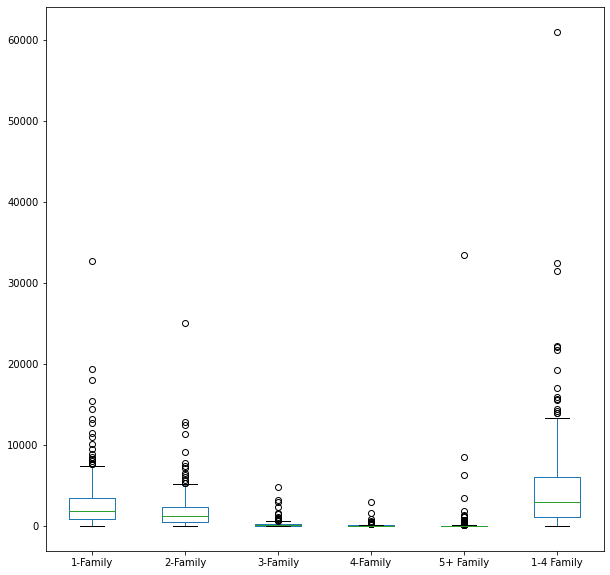

In [17]:
buildings.plot.box(figsize=(10,10))

#### Visited Cities

In [18]:
buildings[buildings['CITY'].isin(visited)]

,CITY,1-Family,2-Family,3-Family,4-Family,5+ Family,1-4 Family
35,BOSTON,32736.0,25047.0,277.0,2928.0,33505.0,60988.0
48,CAMBRIDGE,3971.0,3678.0,281.0,336.0,8559.0,8266.0
144,LAWRENCE,5266.0,1060.0,NaN,NaN,1231.0,6326.0
175,METHUEN,6372.0,3475.0,229.0,84.0,3.0,10160.0


Looking at the box plot, 1-family building have the most volume in most of the cities. Also, a lot of outliers on the high side of 1-4 Family buildings. That means we have a couple of city candidates that have more buildings than most of cities that All In Energy already visited. However, since All In Energy does a lot of door-to-door canvassing, knowing the density of each city is useful too. Let's calculate them.

In [19]:
buildings['density'] = buildings['1-4 Family'] / data['SHAPE_AREA']
buildings

,CITY,1-Family,2-Family,3-Family,4-Family,5+ Family,1-4 Family,density
0,ABINGTON,2726.0,1795.0,83.0,NaN,35.0,4604.0,0.000174
1,ACTON,2650.0,3019.0,NaN,NaN,34.0,5669.0,0.000108
2,ACUSHNET,2650.0,615.0,NaN,NaN,NaN,3265.0,0.000067
3,ADAMS,1002.0,NaN,NaN,NaN,NaN,1002.0,0.000017
4,AGAWAM,7054.0,1638.0,NaN,25.0,NaN,8717.0,0.000138
...,...,...,...,...,...,...,...,...
339,WOBURN,3112.0,4419.0,105.0,86.0,66.0,7722.0,0.000230
340,WORCESTER,15411.0,11373.0,4775.0,922.0,3447.0,32481.0,0.000326
341,WORTHINGTON,271.0,178.0,NaN,NaN,NaN,449.0,0.000005
342,WRENTHAM,1585.0,1866.0,NaN,NaN,19.0,3451.0,0.000059


In order to compare both criteria, we can plot 2 different maps and explore it that way.

In [20]:
cities_shp = gpd.read_file('maps/map cities.shp')
cities_shp = cities_shp.rename(columns={'TOWN':'CITY'})
cities_shp = cities_shp[['CITY', 'geometry']].merge(buildings, on='CITY', how='left')
cities_shp.to_file("maps/buildings cities.geojson", driver='GeoJSON')

In [21]:
all_in_energy = (42.3497392, -71.1067746)
zoom = 9
geojson_data = json.load(open("maps/buildings cities.geojson",'r'))
buildings_data = values_to_bins(buildings['1-4 Family'], width=1, bins=10, normalize=True)
density_data = values_to_bins(buildings['density'], width=1, bins=10, normalize=True)
building_map_data = dict(zip(buildings['CITY'], buildings_data))
density_map_data = dict(zip(buildings['CITY'], density_data))
for feature in geojson_data['features']:
    properties = feature['properties']
    if not properties['CITY'] in building_map_data:
        building_map_data[properties['CITY']] = 0
    if not properties['CITY'] in density_map_data:
        density_map_data[properties['CITY']] = 0
    feature.update(id=properties['CITY'])

In [22]:
building_layer = Choropleth(
    geo_data=geojson_data,
    choro_data=building_map_data,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 1})
density_layer = Choropleth(
    geo_data=geojson_data,
    choro_data=density_map_data,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 1})
marker = Marker(location=all_in_energy, draggable=False)
html_buildings = HTML('''Hover Over Cities''')
html_buildings.layout.margin = '0px 20px 20px 20px'

def update_html_buildings(feature, **kwargs):
     html_buildings.value = '''
     <h3><b>{}</b></h3>
     <h4>1-4 Family buildings: {:.4} buildings</h4>  
      '''.format(feature['properties']['CITY'],
        float(feature['properties']['1-4 Family']) if feature['properties']['1-4 Family'] else 0.0)
html_density = HTML('''Hover Over Cities''')
html_density.layout.margin = '0px 20px 20px 20px'
def update_html_density(feature, **kwargs):
     html_density.value = '''
     <h3><b>{}</b></h3> 
     <h4>Density: {:.4} buildings/sqr miles</h4> 
      '''.format(feature['properties']['CITY'],
        float(feature['properties']['density']) if feature['properties']['density'] else 0.0)
building_layer.on_hover(update_html_buildings)
density_layer.on_hover(update_html_density)
control_buildings = WidgetControl(widget=html_buildings, position='topright')
control_density = WidgetControl(widget=html_density, position='topright')

In [23]:
choro_buildings = Map(center=all_in_energy, zoom=zoom)
choro_density = Map(center=all_in_energy, zoom=zoom)
choro_buildings.add_layer(marker)
choro_density.add_layer(marker)
choro_buildings.add_layer(building_layer)
choro_density.add_layer(density_layer)
choro_buildings.add_control(control_buildings)
choro_density.add_control(control_density)

## Map of Total Qualified Buildings in Cities

In [24]:
choro_buildings

Map(center=[42.3497392, -71.1067746], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

## Map of City Density

In [25]:
choro_density

Map(center=[42.3497392, -71.1067746], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

From both maps we can see that Boston is surrounded by pretty dense cities and some of them have a lot of buildings too compared to their size. This is a good news since All In Energy does not need to go far to get more customers.

In [26]:
most_buildings = buildings[~buildings['CITY'].isin(visited)].sort_values('1-4 Family', ascending=False).head(10)[['CITY', '1-4 Family']]
most_buildings

,CITY,1-4 Family
340,WORCESTER,32481.0
273,SPRINGFIELD,31476.0
154,LOWELL,22211.0
20,BARNSTABLE,22057.0
200,NEWTON,21732.0
194,NEW BEDFORD,19236.0
235,QUINCY,17080.0
93,FALL RIVER,15970.0
94,FALMOUTH,15717.0
157,LYNN,15530.0


In [27]:
most_dense = buildings[~buildings['CITY'].isin(visited)].sort_values('density', ascending=False).head(10)[['CITY', 'density']]
most_dense

,CITY,density
266,SOMERVILLE,0.001246
91,EVERETT,0.000874
338,WINTHROP,0.000773
240,REVERE,0.000708
56,CHELSEA,0.000613
154,LOWELL,0.000590
159,MALDEN,0.000559
26,BELMONT,0.000554
162,MARBLEHEAD,0.000530
157,LYNN,0.000519


### 3. The City with The Most People Speaking Second Language
One of All In Energy goals is to provide energy efficiency programs to the underserved communities. One of those communities is people who speak another language other than English. Specifically Spanish. So, targeting cities with high percentage of Spanish speakers will definitely help that goal. 

In [28]:
spanish = data[['CITY', 'Spanish Speaker', 'Latino or Hispanic']].copy()
spanish.sample(10)

,CITY,Spanish Speaker,Latino or Hispanic
256,SCITUATE,0.89,0.94
304,WARWICK,1.59,1.92
199,NEWBURYPORT,0.81,1.40
190,NANTUCKET,4.17,4.55
59,CHESTERFIELD,0.55,2.21
316,WEST NEWBURY,0.96,1.42
63,CLINTON,13.20,17.05
35,BOSTON,16.85,19.71
181,MILLIS,4.60,4.68
146,LEICESTER,1.86,4.03


Since the dataset has 2 possible columns that we can use to determine the criteria, we can find their correlation. If they strongly correlate, we can just use either one. Let's use linear regression to find the correlation and use the correlation coefficient to determine the accurate result.

Text(0.5, 1.0, 'Correlation between Spanish Speaker and Latino or Hispanic')

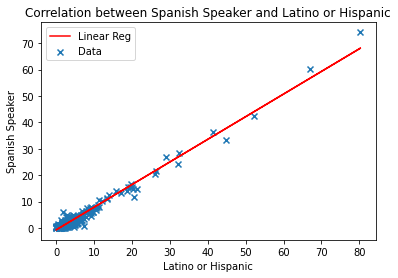

In [29]:
no_na_spanish = spanish.dropna()
plt.scatter(no_na_spanish['Latino or Hispanic'], no_na_spanish['Spanish Speaker'], marker='x', label='Data')
m, b = np.polyfit(no_na_spanish['Latino or Hispanic'], no_na_spanish['Spanish Speaker'], 1)
plt.plot(no_na_spanish['Latino or Hispanic'], m*no_na_spanish['Latino or Hispanic'] + b, color='r', label='Linear Reg')
plt.legend()
plt.xlabel('Latino or Hispanic')
plt.ylabel('Spanish Speaker')
plt.title('Correlation between Spanish Speaker and Latino or Hispanic')

In [30]:
spanish.corr()

,Spanish Speaker,Latino or Hispanic
Spanish Speaker,1.00000,0.98702
Latino or Hispanic,0.98702,1.00000


Both the graph and the correlation coefficient show that Spanish Speaker column and Latino or Hispanic column have a strong correlation. Almost a perfect correlation. This means we can eliminate one of them. Since Spanish Speaker column has less missing data, let's drop Latino or Hispanic column on.

In [31]:
spanish = spanish[['CITY', 'Spanish Speaker']].fillna(0.0)
spanish.sample(10)

,CITY,Spanish Speaker
109,GRANVILLE,2.77
107,GRAFTON,4.78
56,CHELSEA,60.28
153,LONGMEADOW,2.19
254,SAUGUS,3.06
93,FALL RIVER,7.61
303,WARREN,0.02
118,HANCOCK,0.39
319,WEST TISBURY,0.38
8,ANDOVER,2.56


There is a problem. The data is in percentage of each city population which means 1% in Boston will not be the same like 1% in Cambridge. So, we need to convert them into real population number. I downloaded estimated population data from MA cities from [UMass Donahue](https://donahue.umass.edu/business-groups/economic-public-policy-research/massachusetts-population-estimates-program/population-estimates-by-massachusetts-geography/by-city-and-town) which will be sufficient for our purposes.

In [32]:
population = pd.read_csv('MA cities population.csv', dtype={'Population':'int32'})
population.sample(10)

,CITY,Population
221,PLAINFIELD,661
95,EDGARTOWN,4348
38,WEST NEWBURY,4714
268,BLANDFORD,1252
63,NEEDHAM,31388
72,SCITUATE,18924
60,DOVER,6127
180,BOXFORD,8332
64,PLAINVILLE,9293
236,GROTON,11325


In [33]:
spanish = spanish.merge(population, on='CITY', how='left')
spanish = spanish.fillna(0.0)
spanish['Spanish Speaker Population'] = spanish['Spanish Speaker'] / 100 * spanish['Population']
spanish

,CITY,Spanish Speaker,Population,Spanish Speaker Population
0,ABINGTON,1.36,16668.0,226.6848
1,ACTON,1.89,23662.0,447.2118
2,ACUSHNET,1.78,10625.0,189.1250
3,ADAMS,1.18,8010.0,94.5180
4,AGAWAM,3.78,28613.0,1081.5714
...,...,...,...,...
339,WOBURN,3.48,40228.0,1399.9344
340,WORCESTER,14.92,185428.0,27665.8576
341,WORTHINGTON,0.25,1175.0,2.9375
342,WRENTHAM,1.95,12023.0,234.4485


In [34]:
cities_shp = gpd.read_file('maps/map cities.shp')
cities_shp = cities_shp.rename(columns={'TOWN':'CITY'})
cities_shp = cities_shp[['CITY', 'geometry']].merge(spanish, on='CITY', how='left')
cities_shp.to_file("maps/spanish cities.geojson", driver='GeoJSON')

In [35]:
all_in_energy = (42.3497392, -71.1067746)
zoom = 9
spanish_map = Map(center=all_in_energy, zoom=zoom)
geojson_data = json.load(open("maps/spanish cities.geojson",'r'))
spanish_data = values_to_bins(spanish['Spanish Speaker Population'], width=1, bins=10, normalize=True)
maps_data = dict(zip(spanish['CITY'], spanish_data))
for feature in geojson_data['features']:
    properties = feature['properties']
    if not properties['CITY'] in maps_data:
        maps_data[properties['CITY']] = 0
    feature.update(id=properties['CITY'])
spanish_layer = Choropleth(
    geo_data=geojson_data,
    choro_data=maps_data,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 1})
marker = Marker(location=all_in_energy, draggable=False)
html_spanish = HTML('''Hover Over Cities''')
html_spanish.layout.margin = '0px 20px 20px 20px'
control_spanish = WidgetControl(widget=html_spanish, position='topright')
spanish_map.add_control(control_spanish)
def update_html_spanish(feature, **kwargs):
     html_spanish.value = '''
     <h3><b>{}</b></h3>
     <h4>Spanish Speaker: {} People</h4> 
      '''.format(feature['properties']['CITY'],
        int(feature['properties']['Spanish Speaker Population']) if feature['properties']['Spanish Speaker Population'] else -1.0)
spanish_layer.on_hover(update_html_spanish)
spanish_map.add_layer(marker)
spanish_map.add_layer(spanish_layer)

In [36]:
spanish_map

Map(center=[42.3497392, -71.1067746], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Unfortunately, there are only a few of cities that have substantial amount of Spanish speaker. However, this also makes the decision a little bit easier since there is going to be 1 variable less to worry about.

In [37]:
most_spanish = spanish[~spanish['CITY'].isin(visited)].sort_values('Spanish Speaker Population', ascending=False).head(10)[['CITY', 'Spanish Speaker Population']]
most_spanish

,CITY,Spanish Speaker Population
273,SPRINGFIELD,51196.8798
157,LYNN,34183.3875
340,WORCESTER,27665.8576
56,CHELSEA,23925.1320
132,HOLYOKE,17065.7718
154,LOWELL,15484.0815
240,REVERE,15104.5758
194,NEW BEDFORD,14666.8294
98,FRAMINGHAM,10529.8640
91,EVERETT,10005.5454


### 4. The City with The Most Renter
Based on [research](https://www.sciencedirect.com/science/article/pii/S0301421519300205) from 2019 concluded that renters from low income demographic will likely be less energy efficient than other groups due to lack of education for such topic. That is why this criteria will impact a lot of decisions.

In [38]:
owner_renter = data[['CITY', 'OWNER', 'RENTER']].fillna(0).astype({'OWNER':'int32', 'RENTER':'int32'}).copy()
owner_renter

,CITY,OWNER,RENTER
0,ABINGTON,3847,783
1,ACTON,4512,1172
2,ACUSHNET,228,3037
3,ADAMS,846,155
4,AGAWAM,7533,1118
...,...,...,...
339,WOBURN,4986,2679
340,WORCESTER,14295,21630
341,WORTHINGTON,120,328
342,WRENTHAM,2909,561


<AxesSubplot:>

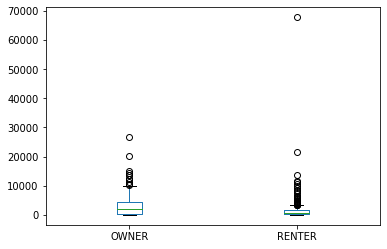

In [39]:
 owner_renter.plot.box()

The graph above shows the distribution of renter and owner across cities. There is an outliers in the graph that makes the graph harder to analyze. Let's cut some top outliers to see most of the data one the small end.

<AxesSubplot:>

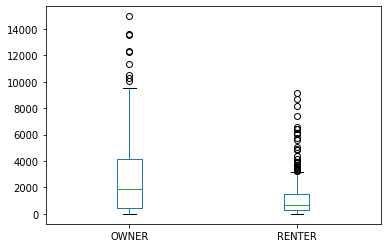

In [40]:
 owner_renter[owner_renter['RENTER'] < 10000].plot.box()

Now is better. We can see that the data is skewed to the smaller numbers. This is consistent with our maps on density and buildings that told us that most of the cities have pretty much homogeneous count of population in general. However, comparing owner and renter, owner group has more common value on the lower end than renter group does.

In [41]:
cities_shp = gpd.read_file('maps/map cities.shp')
cities_shp = cities_shp.rename(columns={'TOWN':'CITY'})
cities_shp = cities_shp[['CITY', 'geometry']].merge(owner_renter, on='CITY', how='left')
cities_shp.to_file("maps/renter cities.geojson", driver='GeoJSON')

In [42]:
all_in_energy = (42.3497392, -71.1067746)
zoom = 9
renter_map = Map(center=all_in_energy, zoom=zoom)
geojson_data = json.load(open("maps/renter cities.geojson",'r'))
renter_data = values_to_bins(owner_renter['RENTER'], width=1, bins=10, normalize=True)
maps_data = dict(zip(owner_renter['CITY'], renter_data))
for feature in geojson_data['features']:
    properties = feature['properties']
    if not properties['CITY'] in maps_data:
        maps_data[properties['CITY']] = 0
    feature.update(id=properties['CITY'])
renter_layer = Choropleth(
    geo_data=geojson_data,
    choro_data=maps_data,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 1})
marker = Marker(location=all_in_energy, draggable=False)
html_renter = HTML('''Hover Over Cities''')
html_renter.layout.margin = '0px 20px 20px 20px'
control_renter = WidgetControl(widget=html_renter, position='topright')
renter_map.add_control(control_renter)
def update_html_renter(feature, **kwargs):
     html_renter.value = '''
     <h3><b>{}</b></h3>
     <h4>Renters: {} People</h4> 
      '''.format(feature['properties']['CITY'],
        feature['properties']['RENTER'] if feature['properties']['RENTER'] else -1.0)
renter_layer.on_hover(update_html_renter)
renter_map.add_layer(marker)
renter_map.add_layer(renter_layer)

In [43]:
renter_map

Map(center=[42.3497392, -71.1067746], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

The renter map above shows that cities around Boston have pretty much the same number of renters. Again this means we have a lot of options to go with surrounding cities.

In [44]:
most_renters = owner_renter[~buildings['CITY'].isin(visited)].sort_values('RENTER', ascending=False).head(10)[['CITY', 'RENTER']]
most_renters

,CITY,RENTER
340,WORCESTER,21630
20,BARNSTABLE,13656
273,SPRINGFIELD,11438
300,WALTHAM,10511
154,LOWELL,10000
73,DENNIS,9163
94,FALMOUTH,8663
170,MEDFORD,8177
343,YARMOUTH,7372
93,FALL RIVER,6543


## D. Choosing The Best City
After we have 10 best cities on each criteria, now we should be able to pick the best one. First, let's put all them all in the same table based on each criteria.

In [45]:
mosts = [most_buildings, most_dense, most_spanish, most_renters]
most_of_most = most_distance[['CITY']].rename(columns={'CITY':'Distance'})
for criteria in mosts:
    most_of_most[criteria.columns[1]] = criteria['CITY'].to_list()
most_of_most

,Distance,1-4 Family,density,Spanish Speaker Population,RENTER
266,SOMERVILLE,WORCESTER,SOMERVILLE,SPRINGFIELD,WORCESTER
45,BROOKLINE,SPRINGFIELD,EVERETT,LYNN,BARNSTABLE
170,MEDFORD,LOWELL,WINTHROP,WORCESTER,SPRINGFIELD
276,STONEHAM,BARNSTABLE,REVERE,CHELSEA,WALTHAM
183,MILTON,NEWTON,CHELSEA,HOLYOKE,LOWELL
336,WINCHESTER,NEW BEDFORD,LOWELL,LOWELL,DENNIS
159,MALDEN,QUINCY,MALDEN,REVERE,FALMOUTH
172,MELROSE,FALL RIVER,BELMONT,NEW BEDFORD,MEDFORD
238,READING,FALMOUTH,MARBLEHEAD,FRAMINGHAM,YARMOUTH
91,EVERETT,LYNN,LYNN,EVERETT,FALL RIVER


Unfortunately, there is no single city that is the best at every single criteria. So, we need to come up a way to find which city is the closest to being the best at every criteria. One way to do that is by giving each city a score. Below, I will give each city a score based on its position in a criteria. For example, Somerville is the first in distance and density, so Somerville will have score 20.

In [46]:
highest_buffer = {}
for col in most_of_most.columns:
    score = 10
    current_cities = most_of_most[col].values
    for city in current_cities:
        if not city in highest_buffer:
            highest_buffer[city] = 0
        highest_buffer[city] += score
        score -= 1
highest = []
for key,value in highest_buffer.items():
    highest.append([key, value])
highest_df = pd.DataFrame(highest, columns=['CITY', 'Score'])
highest_df.sort_values('Score', ascending=False)

,CITY,Score
10,WORCESTER,28
11,SPRINGFIELD,27
12,LOWELL,24
0,SOMERVILLE,20
13,BARNSTABLE,16
22,CHELSEA,13
2,MEDFORD,11
21,REVERE,11
19,LYNN,11
9,EVERETT,11


## E. Conclusion
In today's world where data is a commodity, we can try to answer a question using data that is already there out in the world. For this particular example, we managed to answer which city is the best to expand to using housing data and demographic from each city. It is Worcester. However, there is a problem. The way the score was constructed has an assumption if all of the criteria has an equal importance. So, the next improvement should be finding out a way to differentiate each criteria importance if needed.

> Jimmy Hikmatullah
> Emerson College
> 2020